# 데이터 전처리 코드 모음

### 상관계수 확인 코드 analyze_feature_correlation.py

In [6]:
import pandas as pd
import os

# #파일 불러오기 --> 스크립트(.py)파일로 실행할때 사용하는 주소 방식
# current_dir = os.path.dirname(os.path.abspath(__file__))
# csv_path = os.path.join(current_dir, "..", "data", "T_data.csv")
# df = pd.read_csv(csv_path)


# 현재 작업 디렉토리 확인 (Jupyter 환경에서는 이게 기준)
current_dir = os.getcwd()
csv_path = os.path.join("..", "data", "T_s_date.csv")

# 파일 읽기
df = pd.read_csv(csv_path)

# 숫자형 데이터만 필터링
numeric_df = df.select_dtypes(include='number')

# 'state'와의 상관계수 계산
correlation = numeric_df.corr()['state'].drop('state')

# 절댓값 기준 내림차순 정렬
correlation_sorted = correlation.reindex(correlation.abs().sort_values(ascending=False).index)

print("state와 각 특성 간의 상관관계:")
print(correlation_sorted)


state와 각 특성 간의 상관관계:
temp_max     0.891692
NTC          0.734774
CT2          0.681436
CT3          0.390176
CT1          0.329932
CT4          0.268656
PM2.5        0.232209
time_diff   -0.006293
Name: state, dtype: float64


### 특성 제거 코드 drop_feature.py

In [ ]:
# 상관관계가 낮은 ex_temperature', 'PM1.0', 'PM10', 'ex_humidity', 'ex_illuminance 제거
import os
import pandas as pd

# 현재 작업 디렉토리 확인 (Jupyter 환경에서는 이게 기준)
current_dir = os.getcwd()
csv_path = os.path.join("..", "data", "T_data.csv")

# 파일 읽기
df = pd.read_csv(csv_path)

# 제거할 컬럼 (상관관계 낮음)
drop_columns = ['ex_temperature', 'PM1.0', 'PM10', 'ex_humidity', 'ex_illuminance']

# 컬럼 제거
filtered_df = df.drop(columns=drop_columns)

# 새 파일로 저장
save_path = os.path.join(current_dir, "..", "data", "T_f_data.csv")
filtered_df.to_csv(save_path, index=False)

print("불필요한 컬럼 제거 완료. 저장 경로:", save_path)


### 시간 그래프 확인 

/var/folders/6_/gfrk7lt15d79q76hpjbm56ph0000gn/T/ipykernel_6413/3292439679.py:25: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6_/gfrk7lt15d79q76hpjbm56ph0000gn/T/ipykernel_6413/3292439679.py:25: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6_/gfrk7lt15d79q76hpjbm56ph0000gn/T/ipykernel_6413/3292439679.py:25: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6_/gfrk7lt15d79q76hpjbm56ph0000gn/T/ipykernel_6413/3292439679.py:25: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6_/gfrk7lt15d79q76hpjbm56ph0000gn/T/ipykernel_6413/3292439679.py:25: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6_/gfrk7lt15d79q76hpjbm56ph0000gn/T/ipykernel_64

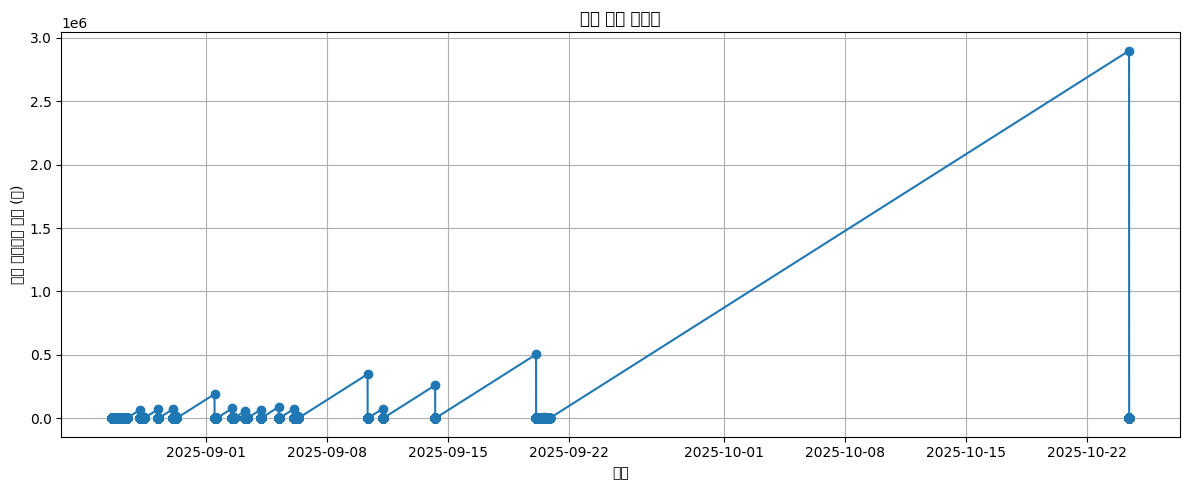

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Jupyter에서 실행: notebooks/ 기준 -> 상위 data/ 폴더 접근
csv_path = os.path.join("..", "data", "T_f_data.csv")
df = pd.read_csv(csv_path)

# 날짜와 시간 컬럼 합치기 (문자열 결합 후 datetime 변환)
df['timestamp'] = pd.to_datetime(df['collection_date'] + ' ' + df['collection_time'])

# 시간순 정렬
df = df.sort_values('timestamp')

# 시간 간격 계산 (단위: 초)
df['time_diff'] = df['timestamp'].diff().dt.total_seconds()

# 그래프 그리기
plt.figure(figsize=(12, 5))
plt.plot(df['timestamp'], df['time_diff'], marker='o', linestyle='-')
plt.title("시간 간격 시각화")
plt.xlabel("시간")
plt.ylabel("이전 측정과의 간격 (초)")
plt.grid(True)
plt.tight_layout()
plt.show()


### collection_date + collection_time = datetime 변환 코드

In [4]:
import pandas as pd
import os

# 파일 경로 설정 (현재 경로 기준)

# Jupyter에서 실행: notebooks/ 기준 -> 상위 data/ 폴더 접근
csv_path = os.path.join("..", "data", "T_f_data.csv")
df = pd.read_csv(csv_path)

# 데이터 불러오기
df = pd.read_csv(csv_path)

# 날짜 + 시간 → timestamp 생성
df['timestamp'] = pd.to_datetime(df['collection_date'].astype(str) + ' ' + df['collection_time'])

# 시간순 정렬
df = df.sort_values('timestamp').reset_index(drop=True)

# 새로운 CSV로 저장
save_path = os.path.join(current_dir, "..", "data", "T_f_t.csv")
df.to_csv(save_path, index=False)

print("timestamp 열 추가 및 저장 완료. 경로:", save_path)


timestamp 열 추가 및 저장 완료. 경로: /Users/kwonminseok/Desktop/semiconductor_tcn_project/notebooks/../data/T_f_t.csv


### 시계열 구간확인

In [ ]:
import pandas as pd

def find_continuous_sequences(df, interval_sec=30, tolerance=0.1, min_length=10):
    """
    시간 간격이 일정한 연속된 시계열 구간들을 식별합니다.

    Parameters:
    - df: timestamp 열이 포함된 DataFrame (정렬되어 있어야 함)
    - interval_sec: 기대하는 시간 간격 (초)
    - tolerance: 허용 오차 비율 (기본 ±10%)
    - min_length: 연속 구간 최소 길이 (이보다 짧으면 무시)

    Returns:
    - 구간 정보 리스트: [(start_idx, end_idx, 시작시간, 끝시간, 길이), ...]
    """
    df = df.copy()
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.sort_values('timestamp').reset_index(drop=True)
    df['time_diff'] = df['timestamp'].diff().dt.total_seconds().fillna(0)

    lower = interval_sec * (1 - tolerance)
    upper = interval_sec * (1 + tolerance)

    sequences = []
    start_idx = 0

    for i in range(1, len(df)):
        if not (lower <= df.loc[i, 'time_diff'] <= upper):
            if i - start_idx >= min_length:
                sequences.append((
                    start_idx,
                    i - 1,
                    df.loc[start_idx, 'timestamp'],
                    df.loc[i - 1, 'timestamp'],
                    i - start_idx
                ))
            start_idx = i

    # 마지막 구간 체크
    if len(df) - start_idx >= min_length:
        sequences.append((
            start_idx,
            len(df) - 1,
            df.loc[start_idx, 'timestamp'],
            df.loc[len(df) - 1, 'timestamp'],
            len(df) - start_idx
        ))

    return sequences


In [9]:
csv_path = os.path.join("..", "data", "T_f_t.csv")
df = pd.read_csv(csv_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['time_diff'] = df['timestamp'].diff().dt.total_seconds()
print(df['time_diff'].describe())

seqs = find_continuous_sequences(df, interval_sec=1, tolerance=0.1, min_length=50)

for s in seqs:
    print(f"구간: index {s[0]} ~ {s[1]}, 시간: {s[2]} ~ {s[3]}, 길이: {s[4]}개")


count    5.904800e+04
mean     8.612551e+01
std      1.229655e+04
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.898100e+06
Name: time_diff, dtype: float64
구간: index 0 ~ 300, 시간: 2025-08-26 13:52:06 ~ 2025-08-26 13:57:06, 길이: 301개
구간: index 301 ~ 601, 시간: 2025-08-26 14:04:28 ~ 2025-08-26 14:09:28, 길이: 301개
구간: index 602 ~ 902, 시간: 2025-08-26 14:16:48 ~ 2025-08-26 14:21:48, 길이: 301개
구간: index 903 ~ 1203, 시간: 2025-08-26 14:29:07 ~ 2025-08-26 14:34:07, 길이: 301개
구간: index 1204 ~ 1504, 시간: 2025-08-26 14:41:53 ~ 2025-08-26 14:46:53, 길이: 301개
구간: index 1505 ~ 1804, 시간: 2025-08-26 16:11:50 ~ 2025-08-26 16:16:49, 길이: 300개
구간: index 1805 ~ 2105, 시간: 2025-08-26 16:25:30 ~ 2025-08-26 16:30:30, 길이: 301개
구간: index 2106 ~ 2406, 시간: 2025-08-26 17:51:35 ~ 2025-08-26 17:56:35, 길이: 301개
구간: index 2407 ~ 2707, 시간: 2025-08-26 18:03:42 ~ 2025-08-26 18:08:42, 길이: 301개
구간: index 2708 ~ 3008, 시간: 2025-08-26 18:16:04 ~ 2025-08-26 18:21:04, 길이: 301개
구간: index 3

### drop_column.py 'device_name', 'collection_date', 'collection_time' 삭제

In [10]:
import pandas as pd
import os

# Jupyter에서 실행: notebooks/ 기준 -> 상위 data/ 폴더 접근
# 파일 경로 지정
input_path = os.path.join("..", "data", "T_f_t.csv")
output_path = os.path.join(current_dir, "..", "data", "T_f_t_d.csv")

# 삭제할 컬럼들
columns_to_drop = ['device_name', 'collection_date', 'collection_time']

# 실행
df = pd.read_csv(input_path)
df = df.drop(columns=columns_to_drop, errors='ignore')
df.to_csv(output_path, index=False)

print(f"[✅] 저장 완료 → {output_path}")


[✅] 저장 완료 → /Users/kwonminseok/Desktop/semiconductor_tcn_project/notebooks/../data/T_f_t_d.csv


### 가중치 설정 코드

In [2]:
import numpy as np
import os

# 현재 노트북 기준으로 상위 폴더의 results 디렉터리 접근
y_path = os.path.join("..", "results", "y_labels.npy")

# y 데이터 로드
y = np.load(y_path)

# 클래스 수 계산
num_classes = np.max(y) + 1

# 클래스별 샘플 수
class_counts = np.bincount(y, minlength=num_classes)
total_samples = len(y)

# 역비례 가중치 계산 (샘플 수 적을수록 높은 가중치)
class_weights = total_samples / (class_counts + 1e-6)


# 출력
print("✅ 클래스별 샘플 수:", class_counts.tolist())
print("✅ 총 샘플 수:", total_samples)
print("✅ 계산된 클래스 가중치:", class_weights.tolist())


✅ 클래스별 샘플 수: [17368, 11367, 11404, 4146]
✅ 총 샘플 수: 44285
✅ 계산된 클래스 가중치: [2.5498042375316787, 3.895926805322783, 3.8832865657766322, 10.681379640453116]


### 가중치 계산 클래스1, 2

In [8]:
import numpy as np

# 클래스별 샘플 수 입력
class_counts = np.array([17368, 11367, 11404, 4146])
total_samples = class_counts.sum()

# 기본 가중치 초기화 (클래스 0, 3은 고정값 1.0)
class_weights = np.ones(4, dtype=np.float32)

# 클래스 1, 2 → 샘플 수에 반비례한 가중치 계산
w1 = total_samples / (class_counts[1] + 1e-6)
w2 = total_samples / (class_counts[2] + 1e-6)

# 🔎 유사한 값이면 강제 보정: 최소 차이 비율 10% 이상 나게 조정
min_diff_ratio = 0.1
if abs(w1 - w2) / max(w1, w2) < min_diff_ratio:
    # 더 적은 클래스에 더 높은 보정 가중치 적용
    if class_counts[1] < class_counts[2]:
        w1 *= 1.1  # 10% 증가
    else:
        w2 *= 1.1

# 적용
class_weights[1] = round(w1, 4)
class_weights[2] = round(w2, 4)

# 결과 출력
print("클래스별 샘플 수:", class_counts.tolist())
print("추천 가중치 (클래스 1, 2만 강조):", class_weights.tolist())


클래스별 샘플 수: [17368, 11367, 11404, 4146]
추천 가중치 (클래스 1, 2만 강조): [1.0, 4.2855000495910645, 3.8833000659942627, 1.0]


### 이전과 초차이 계산

In [3]:
import pandas as pd

# ① 원본 CSV 파일 불러오기 (경로 수정 가능)
df = pd.read_csv("../data/T_f_t_d.csv")

# ② timestamp 열을 datetime 형식으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'])

# ③ 시간 차이 계산 (초 단위), 첫 행은 1로 설정
df['time_diff'] = df['timestamp'].diff().dt.total_seconds().fillna(1)

# ④ 새로운 파일로 저장 (예: T_f_t_with_diff.csv)
save_path = "../data/T_s_date.csv.csv"
df.to_csv(save_path, index=False)

print(f"✅ 새 파일 저장 완료 → {save_path}")


✅ 새 파일 저장 완료 → ../data/T_s_date.csv.csv
